<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/ML_Project_Estimation_of_Pore_Pressure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation of Pore Pressure

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#importing datasets
well1 = pd.read_csv('well 1.csv')
well2 = pd.read_csv('well 2.csv')
well3 = pd.read_csv('well 3.csv')
well4 = pd.read_csv('well 4.csv')
well5 = pd.read_csv('well 5.csv')
well6 = pd.read_csv('well 6.csv')
well7 = pd.read_csv('well 7.csv')
well8 = pd.read_csv('well 8.csv')

In [ ]:
well_data = pd.concat([well1,well2,well3,well4,well5,well6,well7,well8])  #concatenation of different well data

###### Symbols: GR - Gamma Ray;  RHOB - Density; Vp - P-wave velocity; Vsh - S-wave velocity; PP - Pore Pressure

In [ ]:
well_data.head(7)  #preview of data

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,312783.4781,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,314949.9782,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,317116.4783,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,319282.9784,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,321449.4786,1609.0
5,22.7644,57.6985,1.4506,1.4569,0.039357,11.4844,66.1571,0.7671,323615.9787,1609.0
6,22.9168,56.6422,1.4506,1.4581,0.020836,11.4844,66.1566,0.7528,325782.4788,1609.0


In [ ]:
well_data.isnull().sum()  # missing data (if any)

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
Stress         0
PP             0
dtype: int64

### Dealing with Outliers

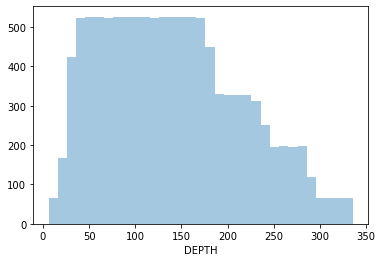

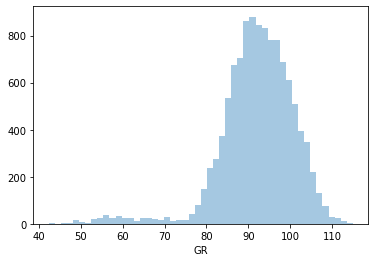

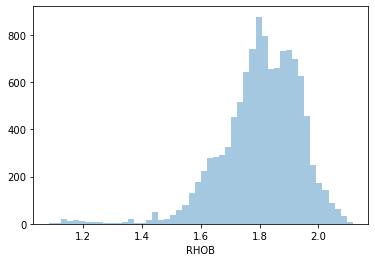

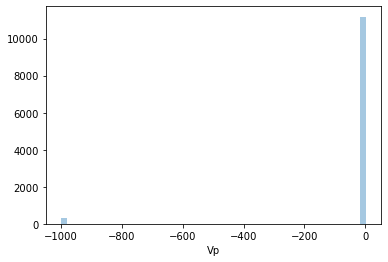

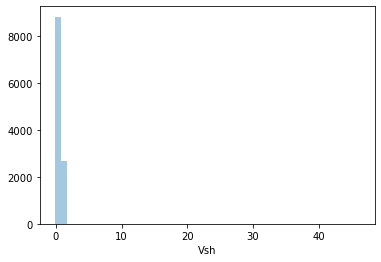

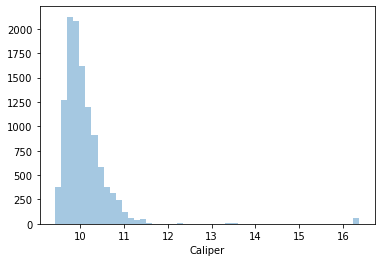

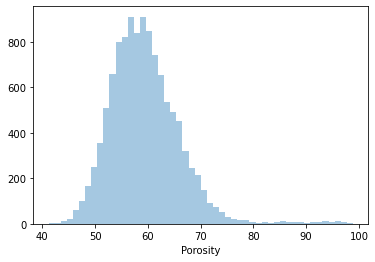

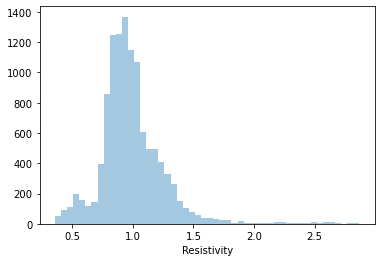

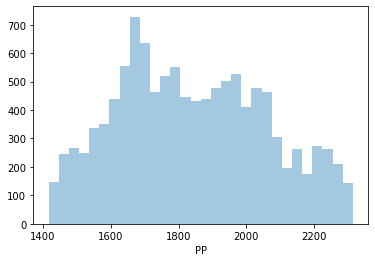

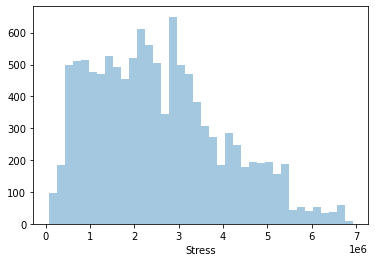

In [ ]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP','Stress']
for col in cols :
    plt.figure()
    sns.distplot(well_data[col], kde = False)            #visualization of raw data

In [ ]:
#Removal of outliers for each category (except stress, Depth & PP)

# GR
well_data['GR'][well_data['GR']<73]= np.nan
# RHOB
well_data['RHOB'][well_data['RHOB']<1.45] = np.nan
# Vp
well_data['Vp'][well_data['Vp']>1.70] = np.nan
# Vsh
well_data['Vsh'][well_data['Vsh']<0.37] = np.nan
# Caliper
well_data['Caliper'][well_data['Caliper']>11.3]= np.nan
# Porosity
well_data['Porosity'][well_data['Porosity']>77]= np.nan
# Resistivity
well_data['Resistivity'][well_data['Resistivity']>1.55]= np.nan

In [ ]:
well_data = well_data.dropna()

In [ ]:
well_data

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
68,32.3656,80.9292,1.5247,1.4885,0.370776,11.0806,67.8705,0.8250,4.836087e+05,1617.0
74,33.2800,74.3024,1.5540,1.4882,0.375210,10.9000,65.7560,0.7660,5.068278e+05,1617.0
75,33.4324,82.5181,1.5606,1.4904,0.497536,10.8887,68.3832,0.7877,5.113111e+05,1620.0
81,34.3468,85.4473,1.5604,1.4921,0.524082,11.0477,70.3602,0.7576,5.252285e+05,1621.0
86,35.1088,76.5998,1.5896,1.4961,0.525943,10.7758,67.0265,0.8186,5.469277e+05,1621.0
...,...,...,...,...,...,...,...,...,...,...
1038,181.3026,105.3357,1.8353,1.4914,0.898063,9.9461,51.5604,1.1152,3.260898e+06,1805.0
1039,181.4550,103.8500,1.8245,1.4815,0.876908,9.9117,54.9033,1.1240,3.244434e+06,1805.0
1040,181.6074,103.2400,1.8128,1.4755,0.868221,9.8249,52.2509,1.1346,3.226335e+06,1803.0
1041,181.7598,102.9838,1.7950,1.4691,0.864573,9.8545,53.2176,1.1472,3.197337e+06,1808.0


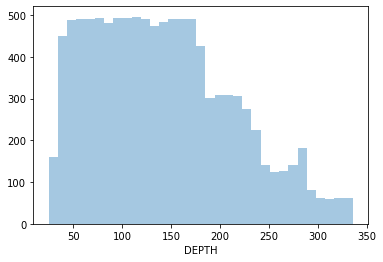

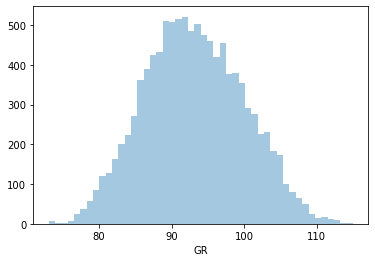

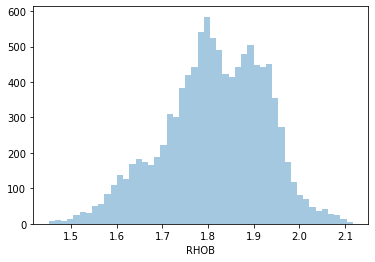

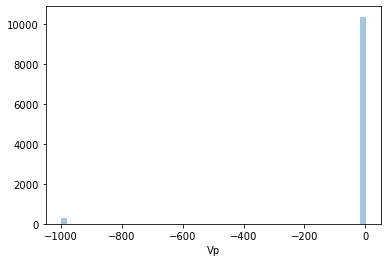

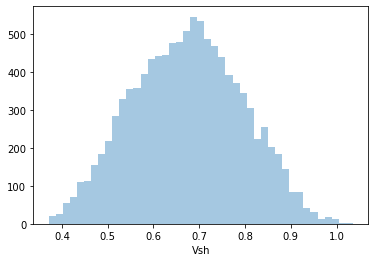

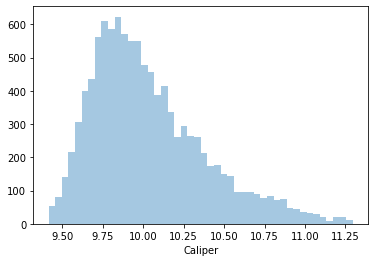

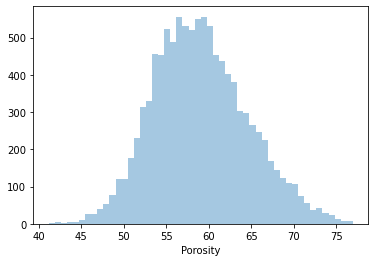

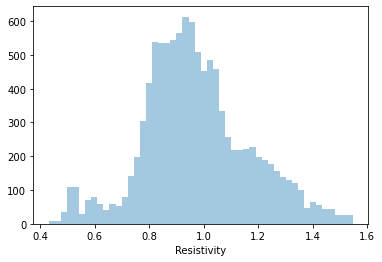

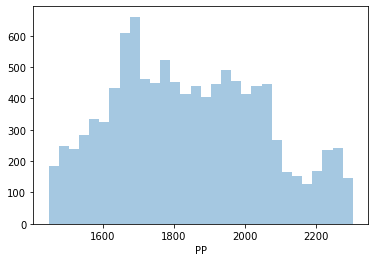

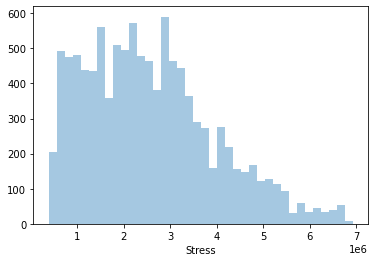

In [ ]:
for col in cols :
    plt.figure()
    sns.distplot(well_data[col], kde = False)  #visualization after removal of outliers

### Scaling the values to (0,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
cols = ['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity', 'Resistivity','Stress']   #only those categories are taken which will be scaled between 0 and 1
scaled= scale.fit_transform(well_data[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity','Resistivity','Stress']])
scaled_wd= pd.DataFrame(scaled, columns= cols)

In [ ]:
scaled_wd

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.188518,0.111261,0.999790,0.000000,0.885374,0.746356,0.352810,0.014843
1,0.030664,0.155196,0.999789,0.006670,0.789356,0.687240,0.300018,0.018390
2,0.226367,0.165092,0.999792,0.190662,0.783348,0.760690,0.319435,0.019075
3,0.296142,0.164792,0.999793,0.230592,0.867882,0.815963,0.292502,0.021201
4,0.085390,0.208577,0.999797,0.233390,0.723324,0.722760,0.347083,0.024515
...,...,...,...,...,...,...,...,...
10647,0.769896,0.576998,0.999793,0.793104,0.282205,0.290363,0.612473,0.439111
10648,0.734505,0.560804,0.999783,0.761283,0.263916,0.383823,0.620347,0.436596
10649,0.719975,0.543260,0.999777,0.748218,0.217768,0.309668,0.629832,0.433831
10650,0.713872,0.516569,0.999770,0.742731,0.233505,0.336695,0.641106,0.429401


In [ ]:
well_data = well_data.reset_index()

In [ ]:
merge= [well_data['DEPTH'], well_data['PP'], scaled_wd]

In [ ]:
pd.concat(merge,axis=1)

,DEPTH,PP,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,32.3656,1617.0,0.188518,0.111261,0.999790,0.000000,0.885374,0.746356,0.352810,0.014843
1,33.2800,1617.0,0.030664,0.155196,0.999789,0.006670,0.789356,0.687240,0.300018,0.018390
2,33.4324,1620.0,0.226367,0.165092,0.999792,0.190662,0.783348,0.760690,0.319435,0.019075
3,34.3468,1621.0,0.296142,0.164792,0.999793,0.230592,0.867882,0.815963,0.292502,0.021201
4,35.1088,1621.0,0.085390,0.208577,0.999797,0.233390,0.723324,0.722760,0.347083,0.024515
...,...,...,...,...,...,...,...,...,...,...
10647,181.3026,1805.0,0.769896,0.576998,0.999793,0.793104,0.282205,0.290363,0.612473,0.439111
10648,181.4550,1805.0,0.734505,0.560804,0.999783,0.761283,0.263916,0.383823,0.620347,0.436596
10649,181.6074,1803.0,0.719975,0.543260,0.999777,0.748218,0.217768,0.309668,0.629832,0.433831
10650,181.7598,1808.0,0.713872,0.516569,0.999770,0.742731,0.233505,0.336695,0.641106,0.429401


In [ ]:
wd_scaled= pd.concat(merge,axis=1)

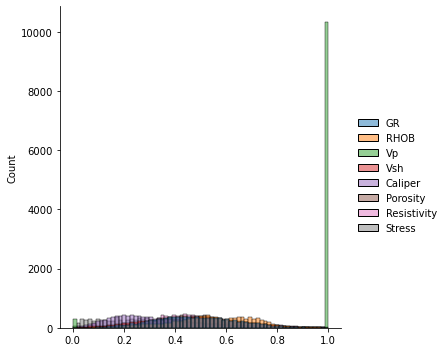

In [ ]:
sns.displot(wd_scaled[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity','Resistivity','Stress']], kde = False)

In [ ]:
well_data = wd_scaled.drop(['Vp'],axis=1)    #dropping P-wave velocity
well_data

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,32.3656,1617.0,0.188518,0.111261,0.000000,0.885374,0.746356,0.352810,0.014843
1,33.2800,1617.0,0.030664,0.155196,0.006670,0.789356,0.687240,0.300018,0.018390
2,33.4324,1620.0,0.226367,0.165092,0.190662,0.783348,0.760690,0.319435,0.019075
3,34.3468,1621.0,0.296142,0.164792,0.230592,0.867882,0.815963,0.292502,0.021201
4,35.1088,1621.0,0.085390,0.208577,0.233390,0.723324,0.722760,0.347083,0.024515
...,...,...,...,...,...,...,...,...,...
10647,181.3026,1805.0,0.769896,0.576998,0.793104,0.282205,0.290363,0.612473,0.439111
10648,181.4550,1805.0,0.734505,0.560804,0.761283,0.263916,0.383823,0.620347,0.436596
10649,181.6074,1803.0,0.719975,0.543260,0.748218,0.217768,0.309668,0.629832,0.433831
10650,181.7598,1808.0,0.713872,0.516569,0.742731,0.233505,0.336695,0.641106,0.429401


In [ ]:
well_data.corr()   #correlation between different features

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
DEPTH,1.000000,0.715753,0.244107,0.607687,0.202665,-0.485182,-0.537115,0.522179,0.995358
PP,0.715753,1.000000,0.310814,0.623625,0.343630,-0.475480,-0.568016,0.662104,0.730961
GR,0.244107,0.310814,1.000000,0.460947,0.929378,-0.240240,-0.435976,0.213618,0.264849
RHOB,0.607687,0.623625,0.460947,1.000000,0.462018,-0.526879,-0.867769,0.452958,0.662407
Vsh,0.202665,0.343630,0.929378,0.462018,1.000000,-0.263800,-0.444774,0.251630,0.225491
Caliper,-0.485182,-0.475480,-0.240240,-0.526879,-0.263800,1.000000,0.397251,-0.413744,-0.486818
Porosity,-0.537115,-0.568016,-0.435976,-0.867769,-0.444774,0.397251,1.000000,-0.419563,-0.585925
Resistivity,0.522179,0.662104,0.213618,0.452958,0.251630,-0.413744,-0.419563,1.000000,0.532117
Stress,0.995358,0.730961,0.264849,0.662407,0.225491,-0.486818,-0.585925,0.532117,1.000000


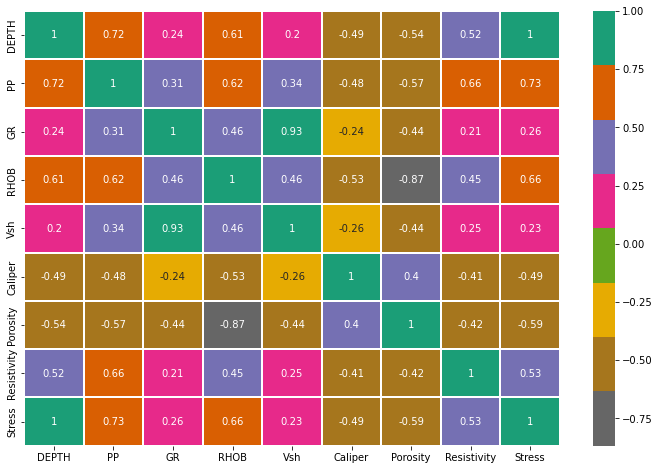

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(well_data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

## ML Models

In [ ]:
from sklearn.model_selection import train_test_split
X = well_data.drop(['DEPTH', 'PP'], axis = 1)  #independent varibales are taken
Y = well_data['PP']  #dependent varibales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42) #splitting into training and test sets

In [ ]:
print(X_train.shape)

(7989, 7)


In [ ]:
print(X_test.shape)

(2663, 7)


#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = True)
model1.fit(X_train, Y_train)
pred_ml = model1.predict(X_test)

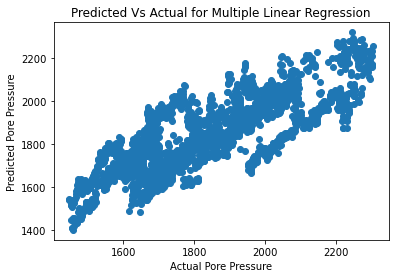

In [ ]:
# visualization of the difference between the actual and predicted pore pressure in multiple linear regression
plt.scatter(Y_test, pred_ml)
plt.xlabel("Actual Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Multiple Linear Regression")
plt.show()

#### XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
xreg=XGBRegressor()
xreg.fit(X_train, Y_train)
pred2 = xreg.predict(X_test)

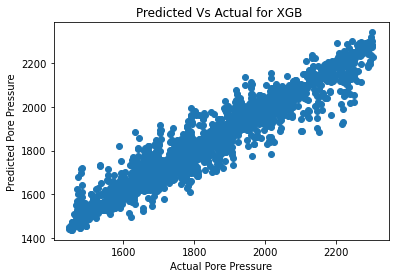

In [ ]:
# visualization of the difference between the actual and predicted pore pressure for XGBoost Regression 
plt.scatter(Y_test, pred2)
plt.xlabel("Actual Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for XGB ")
plt.show()

#### SVM Regressor

In [ ]:
from sklearn import svm
svmreg = svm.SVR()
svmreg.fit(X_train, Y_train)
pred3 = svmreg.predict(X_test)

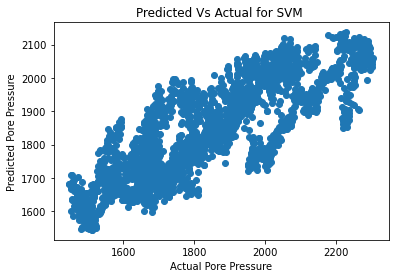

In [ ]:
# visualization of the difference between the actual and predicted pore pressure for SVM Regression
plt.scatter(Y_test, pred3)
plt.xlabel("Actual Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()

#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnfreg = RandomForestRegressor()
rnfreg.fit(X_train, Y_train)
pred4 = rnfreg.predict(X_test)

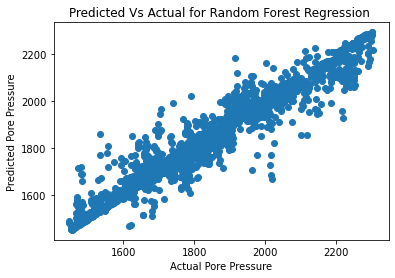

In [ ]:
# visualization of the difference between the actual and predicted pore pressure for Random Forest Regression
plt.scatter(Y_test, pred4)
plt.xlabel("Actual Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest Regression ")
plt.show()

#### Artificial Neural Network Regressor

In [ ]:
import tensorflow as tf

In [ ]:
# Initializing ANN 
ann_model = tf.keras.models.Sequential()

# Adding the first hidden layer
ann_model.add(tf.keras.layers.Dense(units = 200, input_dim = 7, kernel_initializer = 'normal', activation = 'relu'))
ann_model.add(tf.keras.layers.Dense(units = 100, kernel_initializer = 'normal', activation = 'relu')) # second hidden layer
ann_model.add(tf.keras.layers.Dense(units = 50, kernel_initializer = 'normal', activation = 'relu'))  # hird hidden layer
ann_model.add(tf.keras.layers.Dense(units = 25, kernel_initializer = 'normal', activation = 'relu'))  # fourth hidden layer
ann_model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'normal'))     # output layer

In [ ]:
# Complilation of ANN
ann_model.compile(loss = 'mean_squared_error') 

In [ ]:
ann_model.fit(np.array(X_train), np.array(Y_train), epochs=100, batch_size = 10)

Epoch 1/100
799/799 [==============================] - 1s 1ms/step - loss: 396767.2500
Epoch 2/100
799/799 [==============================] - 1s 2ms/step - loss: 18846.4922
Epoch 3/100
799/799 [==============================] - 1s 1ms/step - loss: 17777.0859
Epoch 4/100
799/799 [==============================] - 1s 974us/step - loss: 17293.2324
Epoch 5/100
799/799 [==============================] - 1s 934us/step - loss: 16605.5332
Epoch 6/100
799/799 [==============================] - 1s 1ms/step - loss: 16000.3701
Epoch 7/100
799/799 [==============================] - 1s 1ms/step - loss: 15707.7031
Epoch 8/100
799/799 [==============================] - 1s 946us/step - loss: 15333.8545
Epoch 9/100
799/799 [==============================] - 1s 933us/step - loss: 15009.7666
Epoch 10/100
799/799 [==============================] - 1s 1ms/step - loss: 14737.6660
Epoch 11/100
799/799 [==============================] - 1s 914us/step - loss: 14547.5928
Epoch 12/100
799/799 [===================

In [ ]:
pred5 = ann_model.predict(X_test)

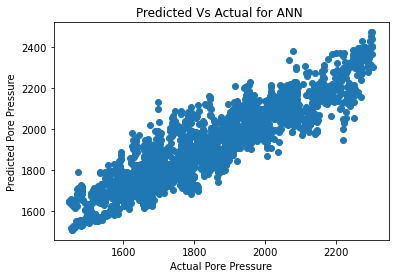

In [ ]:
# visualization of the difference between the actual and predicted pore pressure for ANN Regression
plt.scatter(Y_test, pred5)
plt.xlabel("Actual Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for ANN ")
plt.show()

### Testing the Models

In [ ]:
from sklearn import metrics

In [ ]:
models=pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machine', 'ANN'],
    'R_squared Score':[metrics.r2_score(Y_test, pred_ml)*100, metrics.r2_score(Y_test, pred4)*100, metrics.r2_score(Y_test, pred2)*100, metrics.r2_score(Y_test, pred3)*100, metrics.r2_score(Y_test, pred5)*100]
})
models.sort_values(by ='R_squared Score', ascending=False)

,Model,R_squared Score
1,Random Forest,94.098961
2,XGBoost,92.660989
4,ANN,70.318743
3,Support Vector Machine,65.629860
0,Linear Regression,65.487990
